# 万科2018年春季深圳社招

## 概述

In [105]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [65]:
vanke_row = pandas.read_csv('E:\\MySQL_data\\vanke_hr_info.csv',encoding = 'utf-8')

In [271]:
vanke_row.sample(3)

,id,position,company,degreee,experience,number,job_content,job_demand,occupation,update,Experience,Number,month
54,38062216,架构师,物业事业部,学历不限,7 - 15年工作经验,招聘1人,1、主导公司产品架构设计或对现有技术架构的优化，技术选型决策； 2、新技术预演，将合适的新开...,1.7~12年工作经验，7年以上JAVA开发经验，至少负责过两个以上大中型系统的总体规划和架...,NaN,2018-02-28,7.0,1.0,2
53,36739909,财务BP,物业发展,学历不限,5 - 10年工作经验,招聘1人,岗位职责： 1、负责业务单元的财务指标设定及管理，熟悉预算管理； 2、核算管理及财务运营管理...,任职要求： 1、本科以上学历，会计、财务或相关专业，具有中级以上职称，CPA、ACCA等资格...,NaN,2018-02-28,5.0,1.0,2
52,38356545,产品运营总监,物业发展,学历不限,4 - 8年工作经验,招聘1人,岗位职责  理解公司的互联网产品战略，参与制定产品方案，负责制定全国运营方案；  搭建与...,任职要求  具有极致的创造力，对发现和解决问题高度兴奋；  5年以上工作经验，有15人以...,物业,2018-03-07,4.0,1.0,3


特征描述：<br>

|id|position|company|degreee|experience|
|-------|-------|-------|------|----------|
|职位的id|职位名称|招聘部门|学历要求|工作经验要求|
|number|job_content|job_demand|occupation|update|
|招聘人数|工作内容|对应聘人员的要求|业态|职位发布日期|


## 数据清洗

`city`全为深圳，抛弃，将`degereee`标签化<br>
> 标签化失败，因为无法定位`vanke_row.loc[vanke_row['degreee'] == '专科']`返回的结果是None，是编码的问题，但是如何破解，暂未找到方法<br>

In [289]:
vanke_row.loc[vanke_row['degreee'] == '专科','degreee']

Series([], Name: degreee, dtype: object)

### 从experience中提取数字

In [66]:
vanke_row['Experience'] = vanke_row.experience.str.extract(r'(\d+).*',expand=False) 

vanke_row.loc[vanke_row['Experience'].notnull() == True,'Experience'].astype(int)
vanke_row.loc[vanke_row['Experience'].isnull() == True,'Experience'] = 0

vanke_row.loc[vanke_row['Experience'] == 2018,'Experience'] = 0

### 从number中提取数字

In [92]:
vanke_row['Number'] = vanke_row.number.str.extract(r'..(\d+).',expand=False) 

vanke_row['Number'] = vanke_row.loc[vanke_row['Number'].notnull() == True,\
                                    'Number'].astype(int)

vanke_row.loc[vanke_row['Number'].isnull()== True,'Number'] = 1

In [287]:
vanke_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 2 to 101
Data columns (total 13 columns):
id             99 non-null int64
position       99 non-null object
company        99 non-null object
degreee        99 non-null object
experience     99 non-null object
number         99 non-null object
job_content    99 non-null object
job_demand     99 non-null object
occupation     92 non-null object
update         99 non-null datetime64[ns]
Experience     99 non-null float64
Number         99 non-null float64
month          99 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(8)
memory usage: 12.9+ KB


## 分析

### 部门对人员工作经验要求

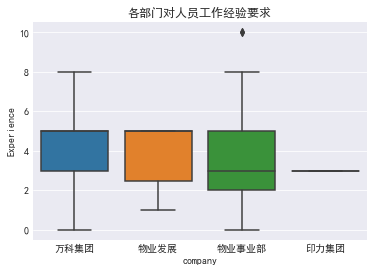

In [115]:
sns.set_style('darkgrid')
plt.rcParams['font.family'] = ['SimHei']
sns.boxplot(x='company',y='Experience',data=vanke_row)
plt.title('各部门对人员工作经验要求');

结论：万科社招对人员要求工作经验主要集中3~5年

### 各部门招聘人数

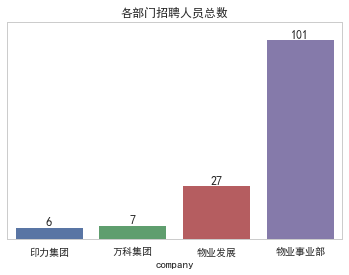

In [291]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = ['SimHei']
ax = sns.barplot(x='company',y='Number',
                 data=vanke_row.groupby(by='company',as_index=False).sum(),  
                 order = ['印力集团','万科集团','物业发展','物业事业部']
                )
plt.title('各部门招聘人员总数')
ax.set_ylim(0,110)
ax.set_ylabel('')
ax.set_yticks([]);
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{}'.format(int(y)),
               (x.mean(),y),
               ha = 'center',
               va = 'bottom')

结论：物业事业部招聘人数明显多于其它部门

奇怪的是，这里作图时order中也是汉字，但是仍然可以定位、排序

### 各部门职位发布日期

In [180]:
vanke_row['month'] = pandas.to_datetime(vanke_row['update']).dt.month.astype(int)

In [201]:
vanke_row['update'] = pandas.to_datetime(vanke_row['update'],
                                         format='%Y-%m-%d',
                                        box = False,
                                        )

Text(0.5,0,'月份')

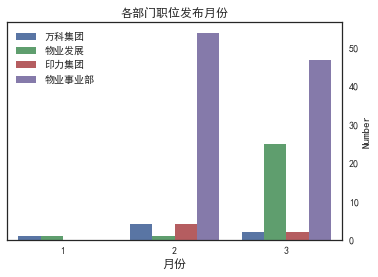

In [330]:
sns.set(style = 'white')
plt.rcParams['font.family'] = ['SimHei']
ax = sns.barplot(x='month',y='Number',
                 data = vanke_row.groupby(['month','company'],as_index=False).sum(),
                hue = 'company')
ax.legend(loc='upper left')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
plt.title('各部门职位发布月份')
plt.xlabel('月份',fontsize=12)

对于岗位发布日期，印力集团主要集中在3月份发布；其它部门在2、3月发布没有明显区别。<br>
其实我这里想做一个横轴为日期，纵轴为招聘人数，按照部门分类的直方图，但是未能实现。故只能按照月份分类汇总。

### 学历要求

In [292]:
vanke_row.groupby('degreee',as_index=False).median().\
sort_values(by='Experience',ascending=True)

,degreee,id,Experience,Number,month
0,专科,37873018.0,3.0,2.0,2
2,本科,36740656.0,3.0,1.0,2
1,学历不限,37801360.0,4.0,1.0,3
3,硕士,36891967.5,5.5,1.0,2


学历不限的经验要求大于专科、本科的经验要求

Text(0,0.5,'招聘人数')

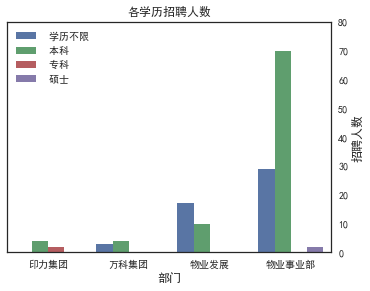

In [332]:
sns.set_style('white')
plt.rcParams['font.family'] = ['SimHei']

ax = sns.barplot(
        x='company',y='Number',
        data = vanke_row.groupby(['company','degreee'],as_index=False).sum(),
        hue='degreee',
        order = ['印力集团','万科集团','物业发展','物业事业部'],
                )
plt.subplots_adjust(left=0.15,right=0.9,
                    bottom=0.1, top=0.9)
ax.set_ylim([0,80])
ax.legend(loc='upper left')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
plt.title('各学历招聘人数')
plt.xlabel('部门',fontsize=12)
plt.ylabel('招聘人数',fontsize=12)

结论：本科是起步条件